In [3]:
import os, shutil

In [4]:
base_dir = 'C:/Users/Berkin/Desktop/Dataset'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Create directories that contain the training data
train_eagle_dir = os.path.join(train_dir, 'eagle')
os.mkdir(train_eagle_dir)
train_tiger_dir = os.path.join(train_dir, 'tiger')
os.mkdir(train_tiger_dir)

# Create directories that contain the validation data
validation_eagle_dir = os.path.join(validation_dir, 'eagle')
os.mkdir(validation_eagle_dir)
validation_tiger_dir = os.path.join(validation_dir, 'tiger')
os.mkdir(validation_tiger_dir)

# Create directories that contain the test data
test_eagle_dir = os.path.join(test_dir, 'eagle')
os.mkdir(test_eagle_dir)
test_tiger_dir = os.path.join(test_dir, 'tiger')
os.mkdir(test_tiger_dir)

In [5]:
original_dataset_dir = 'C:/Users/Berkin/Desktop/Veriler'
base_dir = 'C:/Users/Berkin/Desktop/Dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_eagle_dir = os.path.join(train_dir, 'eagle')
train_tiger_dir = os.path.join(train_dir, 'tiger')

validation_eagle_dir = os.path.join(validation_dir, 'eagle')
validation_tiger_dir = os.path.join(validation_dir, 'tiger')

test_eagle_dir = os.path.join(test_dir, 'eagle')
test_tiger_dir = os.path.join(test_dir, 'tiger')

In [6]:
fnames = ['eagle.{}.jpg'.format(i) for i in range(120)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_eagle_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['eagle.{}.jpg'.format(i) for i in range(120, 140)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_eagle_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['eagle.{}.jpg'.format(i) for i in range(140, 150)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_eagle_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['tiger.{}.jpg'.format(i) for i in range(120)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_tiger_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['tiger.{}.jpg'.format(i) for i in range(120, 140)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_tiger_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['tiger.{}.jpg'.format(i) for i in range(140, 150)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_tiger_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
print('total training eagle images:', len(os.listdir(train_eagle_dir)))
print('total training tiger images:', len(os.listdir(train_tiger_dir)))
print('total training images:', len(os.listdir(train_eagle_dir)) + len(os.listdir(train_tiger_dir)))
print()

print('total validation eagle images:', len(os.listdir(validation_eagle_dir)))
print('total validation tiger images:', len(os.listdir(validation_tiger_dir)))
print('total validation images:', len(os.listdir(validation_eagle_dir)) + len(os.listdir(validation_tiger_dir)))
print()

print('total test eagle images:', len(os.listdir(test_eagle_dir)))
print('total test tiger images:', len(os.listdir(test_tiger_dir)))
print('total test images:', len(os.listdir(test_eagle_dir)) + len(os.listdir(test_tiger_dir)))
print()

total training eagle images: 120
total training tiger images: 120
total training images: 240

total validation eagle images: 20
total validation tiger images: 20
total validation images: 40

total test eagle images: 10
total test tiger images: 10
total test images: 20



In [8]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [9]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale pixel values from [0, 255] to [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=50,
    class_mode='binary') # because we use binary_crossentropy loss we need binary labels

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

Found 240 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print ('data batch shape:', data_batch.shape)
    print ('labels batch shape:', labels_batch.shape)
    break

data batch shape: (50, 224, 224, 3)
labels batch shape: (50,)


In [11]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=320, # 50 batches in the generator, so it takes 320 batches to get to 16000 images
    epochs=30,
    validation_data=validation_generator,
    validation_steps=90) # 90 x 50 == 4500

Epoch 1/30
320/320 [==============================] - 1670s 5s/step - loss: 0.1722 - acc: 0.9303 - val_loss: 0.2191 - val_acc: 0.9000
Epoch 2/30
320/320 [==============================] - 1878s 6s/step - loss: 0.0543 - acc: 0.9893 - val_loss: 0.3068 - val_acc: 0.8750
Epoch 3/30
320/320 [==============================] - 1992s 6s/step - loss: 0.0361 - acc: 0.9959 - val_loss: 0.3435 - val_acc: 0.9000
Epoch 4/30
320/320 [==============================] - 1971s 6s/step - loss: 0.0287 - acc: 0.9962 - val_loss: 0.3770 - val_acc: 0.8750
Epoch 5/30
320/320 [==============================] - 1840s 6s/step - loss: 0.0371 - acc: 0.9964 - val_loss: 0.3929 - val_acc: 0.9000
Epoch 6/30
320/320 [==============================] - 1412s 4s/step - loss: 0.0395 - acc: 0.9970 - val_loss: 0.5710 - val_acc: 0.8500
Epoch 7/30
320/320 [==============================] - 1379s 4s/step - loss: 0.0388 - acc: 0.9966 - val_loss: 0.8511 - val_acc: 0.8500
Epoch 8/30
320/320 [==============================] - 1232s 4s

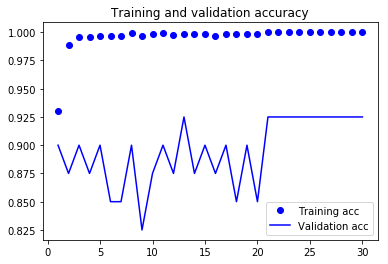

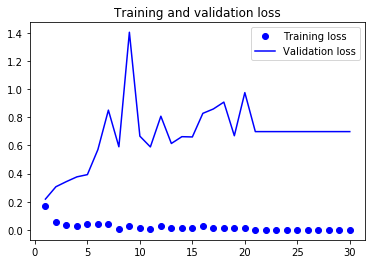

In [12]:
plot_accuracy_and_loss(history)

## 20.ci epoch tan sonra loss değeri oldukça fazla biçimde yükselmiştir, ezberleme başlamıştır. Burada overfit gözlemlenmiştir.Bunun sebeplerinden biri datasetimizin az olmasıdır.(150 -150 fotograf)

In [12]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc:', test_acc)


Found 20 images belonging to 2 classes.
test acc: 0.5


In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

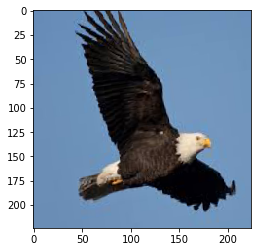

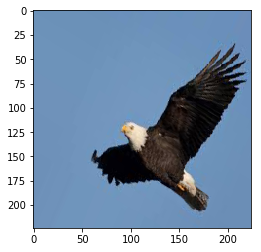

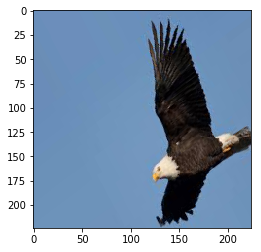

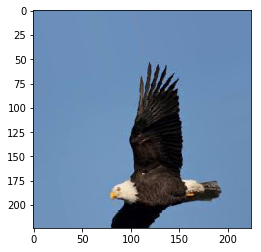

In [14]:
from keras.preprocessing import image

fnames = [os.path.join(train_eagle_dir, fname) for fname in os.listdir(train_eagle_dir)]

img_path = fnames[4] # Choose one image to augment

img = image.load_img(img_path, target_size=(224, 224)) # load image and resize it

x = image.img_to_array(img) # Convert to a Numpy array with shape (224, 224, 3)

x = x.reshape((1,) + x.shape)

# Generates batches of randomly transformed images.
# Loops indefinitely, so you need to break once four images have been created
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # Note that validation data should not be augmented

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

Found 240 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [19]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=960, # 960 x 50 = 48000 (we are showing different augmented images more than once per epoch)
    epochs=30,
    validation_data=validation_generator,
    validation_steps=90) # 90 x 50 == 4500

Epoch 1/30
960/960 [==============================] - 4229s 4s/step - loss: 0.1889 - acc: 0.9199 - val_loss: 0.1688 - val_acc: 0.9000
Epoch 2/30
960/960 [==============================] - 4955s 5s/step - loss: 0.0473 - acc: 0.9834 - val_loss: 0.3331 - val_acc: 0.9500
Epoch 3/30
960/960 [==============================] - 4632s 5s/step - loss: 0.0237 - acc: 0.9919 - val_loss: 0.5189 - val_acc: 0.9250
Epoch 4/30
960/960 [==============================] - 4437s 5s/step - loss: 0.0171 - acc: 0.9948 - val_loss: 0.1929 - val_acc: 0.9500
Epoch 5/30
960/960 [==============================] - 4675s 5s/step - loss: 0.0132 - acc: 0.9962 - val_loss: 0.6131 - val_acc: 0.9000
Epoch 6/30
960/960 [==============================] - 4899s 5s/step - loss: 0.0133 - acc: 0.9966 - val_loss: 0.2376 - val_acc: 0.9250
Epoch 7/30
960/960 [==============================] - 4050s 4s/step - loss: 0.0110 - acc: 0.9969 - val_loss: 0.0178 - val_acc: 1.0000
Epoch 8/30
960/960 [==============================] - 3739s 4s

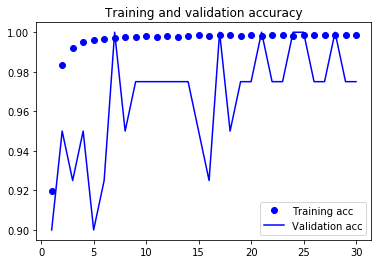

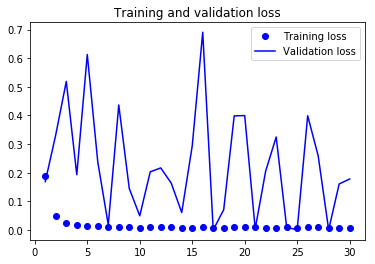

In [20]:
plot_accuracy_and_loss(history)

## Bu grafiklerde ise yine overfit gözlemlenmiştir. Fakat 1. adıma göre farkı overfit olmaya başlayan nokta daha geçtir.Grafiğin daha düzenli çıkma sebebi ise data augmentation yönetimi ile elimizdeki datasetin artmasından dolayıdır.

In [21]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc:', test_acc)

Found 20 images belonging to 2 classes.
test acc: 1.0


In [17]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # Note the change that we added dropout here
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [18]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale pixel values from [0, 255] to [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=50,
    class_mode='binary') # because we use binary_crossentropy loss we need binary labels

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=50,
    class_mode='binary')

Found 240 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=320, # 320 x 50 == 16000
    epochs=30,
    validation_data=validation_generator,
    validation_steps=90) # 90 x 50 == 4500

Epoch 1/30
320/320 [==============================] - 1258s 4s/step - loss: 0.1650 - acc: 0.9294 - val_loss: 0.3271 - val_acc: 0.8750
Epoch 2/30
320/320 [==============================] - 1245s 4s/step - loss: 0.0313 - acc: 0.9931 - val_loss: 0.3973 - val_acc: 0.8250
Epoch 3/30
320/320 [==============================] - 1251s 4s/step - loss: 0.0267 - acc: 0.9944 - val_loss: 0.4403 - val_acc: 0.8500
Epoch 4/30
320/320 [==============================] - 1241s 4s/step - loss: 0.0192 - acc: 0.9970 - val_loss: 0.5334 - val_acc: 0.8500
Epoch 5/30
320/320 [==============================] - 1245s 4s/step - loss: 0.0248 - acc: 0.9969 - val_loss: 0.5722 - val_acc: 0.8250
Epoch 6/30
320/320 [==============================] - 1261s 4s/step - loss: 0.0198 - acc: 0.9974 - val_loss: 0.7462 - val_acc: 0.8750
Epoch 7/30
320/320 [==============================] - 1298s 4s/step - loss: 0.0144 - acc: 0.9977 - val_loss: 0.7278 - val_acc: 0.8500
Epoch 8/30
320/320 [==============================] - 1477s 5s

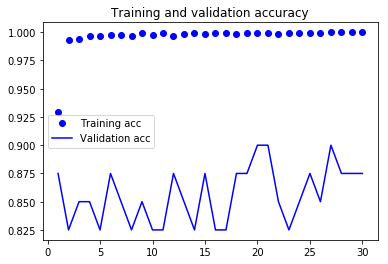

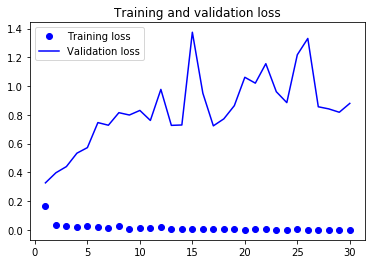

In [25]:
plot_accuracy_and_loss(history)

##  bu grafiklerin gerçek hayat problemlerinde oluşması biraz zordur. Sebebi datasatesimiz az sayıda olmasındandır.Burda tekrardan overfit gözlemlenmiştir.


In [19]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # Note the change that we added dropout here
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [20]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale pixel values from [0, 255] to [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=50,
    class_mode='binary') # because we use binary_crossentropy loss we need binary labels

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=50,
    class_mode='binary')

Found 240 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [21]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=320, # 320 x 50 == 16000
    epochs=5,
    validation_data=validation_generator,
    validation_steps=90) # 90 x 50 == 4500

Epoch 1/5
320/320 [==============================] - 1248s 4s/step - loss: 0.1652 - acc: 0.9333 - val_loss: 1.3658 - val_acc: 0.7000
Epoch 2/5
320/320 [==============================] - 1238s 4s/step - loss: 0.0443 - acc: 0.9902 - val_loss: 0.3201 - val_acc: 0.8250
Epoch 3/5
320/320 [==============================] - 1307s 4s/step - loss: 0.0273 - acc: 0.9956 - val_loss: 0.3586 - val_acc: 0.8250
Epoch 4/5
320/320 [==============================] - 1327s 4s/step - loss: 0.0173 - acc: 0.9964 - val_loss: 0.4081 - val_acc: 0.8500
Epoch 5/5
320/320 [==============================] - 1307s 4s/step - loss: 0.0280 - acc: 0.9962 - val_loss: 0.8518 - val_acc: 0.8750


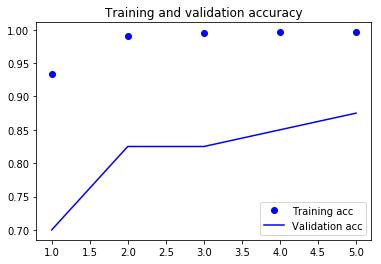

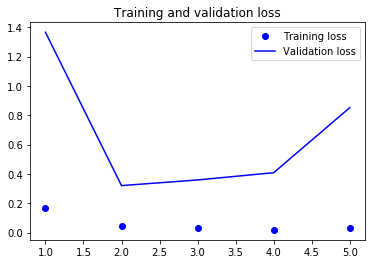

In [22]:
plot_accuracy_and_loss(history)

In [23]:
 ## epoch u erken kestiğimiz icin burda overfiti engellemiş olduk bu yüzden daha olumlu ve anlaşılır bir grafik elde ettik.